In [10]:
!pip install contractions

In [11]:
#Librerias
import pandas as pd
import numpy as np
import sys

from pandas_profiling import ProfileReport

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib as mplt
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

In [12]:
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
#Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#Encuentra lema de cada palabra
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Descarga los otros recursos de NLTK para el análisis de sentimientos
nltk.download(["names","averaged_perceptron_tagger","vader_lexicon"])

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Perfilamiento

**Moda, Min, Max y  Conteo de palabras en los tweets**

In [16]:
#Crear dataframe
data=pd.read_csv('mbsaEn4.csv', sep=',', encoding = 'utf-8')
data.head()

,Date,text,Sentiment
0,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive
1,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive
2,2019-05-27,Invested my Life Savings into Bitcoin and Ethe...,Positive
3,2019-05-27,"Bitcoin Price Hits $8,939 in New 2019 High: Wh...",Positive
4,2019-05-27,You have roughly 6 days left to get your #Laun...,Positive


In [17]:
data_prueba = data

In [18]:
#Numero de caracteres en cada tweet
data_prueba['Conteo'] = [len(x) for x in data_prueba['text']]
data_prueba.head()

,Date,text,Sentiment,Conteo
0,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive,225
1,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive,61
2,2019-05-27,Invested my Life Savings into Bitcoin and Ethe...,Positive,109
3,2019-05-27,"Bitcoin Price Hits $8,939 in New 2019 High: Wh...",Positive,102
4,2019-05-27,You have roughly 6 days left to get your #Laun...,Positive,304


In [19]:
#Min: Palabra con menos caracteres
data_prueba['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in data_prueba['text']]
data_prueba.head()

,Date,text,Sentiment,Conteo,Min
0,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive,225,0
1,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive,61,1
2,2019-05-27,Invested my Life Savings into Bitcoin and Ethe...,Positive,109,1
3,2019-05-27,"Bitcoin Price Hits $8,939 in New 2019 High: Wh...",Positive,102,2
4,2019-05-27,You have roughly 6 days left to get your #Laun...,Positive,304,1


In [20]:
#Max: Palabra en el tweet con mayor caracteres
data_prueba['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in data_prueba['text']]
data_prueba.head()

,Date,text,Sentiment,Conteo,Min,Max
0,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive,225,0,23
1,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive,61,1,7
2,2019-05-27,Invested my Life Savings into Bitcoin and Ethe...,Positive,109,1,23
3,2019-05-27,"Bitcoin Price Hits $8,939 in New 2019 High: Wh...",Positive,102,2,23
4,2019-05-27,You have roughly 6 days left to get your #Laun...,Positive,304,1,23


In [21]:
#Mode
from collections import Counter
from itertools import groupby



In [22]:
from collections import Counter
 
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]



In [23]:
#Moda: Palabra mas repetida en cada tweet
data_prueba['Mode'] = [most_frequent([x for x in i.split(' ')]) for i in data_prueba['text']]
data_prueba.head()

,Date,text,Sentiment,Conteo,Min,Max,Mode
0,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive,225,0,23,
1,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive,61,1,7,Another
2,2019-05-27,Invested my Life Savings into Bitcoin and Ethe...,Positive,109,1,23,Invested
3,2019-05-27,"Bitcoin Price Hits $8,939 in New 2019 High: Wh...",Positive,102,2,23,Bitcoin
4,2019-05-27,You have roughly 6 days left to get your #Laun...,Positive,304,1,23,to


In [24]:
!pip install -U pandas_profiling

In [25]:
#ProfileReport(data_prueba)

## Limpieza de Datos 

**Definicion de funciones**

In [26]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


In [27]:
#Pasa todos los caracteres a minusculas
def to_lowercase(words):
    texto_min =[]
    for pal in words:
      pal_nva = pal.lower()
      texto_min.append(pal_nva)
    return texto_min  

In [28]:
#Remueve la puntuacionn de las palabras tokenizadas
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


In [29]:
#Reemplaza numeros por palabras
def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
          try:
            new_word = p.number_to_words(word)
            new_words.append(new_word)
          except:
            print("skipped"+ word)
              
          
        else:
            new_words.append(word)
    return new_words

In [30]:
#Elimina todas las palabras vacias
def remove_stopwords(words):
    new_words = []
    stop_words = set(stopwords.words('english'))
    for w in words:
      if w not in stop_words:
        new_words.append(w)
    return new_words



In [31]:
#Aplica todos los cambios
def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [32]:
preprocessing(['@','HeLlo','$456.5','These','our','%^&',',,,,,',])

['hello', '4565']

## Limpieza de metadatos de twitter

In [33]:
# Elimina las urls del texto
import re
def remove_urls(w): 
  return re.sub(r"http\S+", "", w, flags=re.MULTILINE)

In [34]:
def remove_mentions(w):
  return re.sub("@[A-Za-z0-9]+","", w)

In [35]:
def remove_hashtags(w):
  return re.sub("#[A-Za-z0-9_]+","", w)

In [36]:
def get_hashtags(w):
  return ' '.join([tag.strip("#") for tag in w.split() if tag.startswith("#")])


In [37]:
data_prueba["hashtags"] = data_prueba['text'].apply(lambda x: get_hashtags(x))
data_prueba["hashtags"] 

0        FolloForFolloBack follo4folloback followforfol...
1                                                         
2                                                       09
3                                                         
4        LaunhPadFoundation raffle Litecoin!! tickets L...
                               ...                        
52675                                                     
52676                                                     
52677                                                     
52678                                                     
52679                                                     
Name: hashtags, Length: 52680, dtype: object

In [38]:
data_prueba['text'] = data_prueba['text'].apply(lambda x: remove_urls(x)).apply(lambda x: remove_mentions(x)).apply(lambda x: remove_hashtags(x))
data_prueba['text']


0        Cardano: Digitize Currencies; EOS  6500% ROI; ...
1        Another Test tweet that wasn't caught in the s...
2        Invested my Life Savings into Bitcoin and Ethe...
3        Bitcoin Price Hits $8,939 in New 2019 High: Wh...
4        You have roughly 6 days left to get your  50/5...
                               ...                        
52675                                     It's happening. 
52676                    How much bitcoin for a gamer girl
52677                                      Bitcoin flying.
52678                                in Bitcoin we trust😎 
52679            I think you may be on to something here 🤔
Name: text, Length: 52680, dtype: object

## Tokenizacion

In [39]:
#Correccion de las contracciones y elimina las urls antes de tokenizar
data_prueba['text'] = data_prueba['text'].apply(contractions.fix) 

In [40]:
data_prueba.head()

,Date,text,Sentiment,Conteo,Min,Max,Mode,hashtags
0,2019-05-27,Cardano: Digitize Currencies; EOS 6500% ROI; ...,Positive,225,0,23,,FolloForFolloBack follo4folloback followforfol...
1,2019-05-27,Another Test tweet that was not caught in the ...,Positive,61,1,7,Another,
2,2019-05-27,Invested my Life Savings into Bitcoin and Ethe...,Positive,109,1,23,Invested,09
3,2019-05-27,"Bitcoin Price Hits $8,939 in New 2019 High: wh...",Positive,102,2,23,Bitcoin,
4,2019-05-27,You have roughly 6 days left to get your 50/5...,Positive,304,1,23,to,LaunhPadFoundation raffle Litecoin!! tickets L...


In [41]:
#Tokenizar 
data_prueba['words'] = data_prueba['text'].apply(word_tokenize).apply(preprocessing) 
data_prueba.head()

,Date,text,Sentiment,Conteo,Min,Max,Mode,hashtags,words
0,2019-05-27,Cardano: Digitize Currencies; EOS 6500% ROI; ...,Positive,225,0,23,,FolloForFolloBack follo4folloback followforfol...,"[cardano, digitize, currencies, eos, six thous..."
1,2019-05-27,Another Test tweet that was not caught in the ...,Positive,61,1,7,Another,,"[another, test, tweet, caught, stream, bitcoin]"
2,2019-05-27,Invested my Life Savings into Bitcoin and Ethe...,Positive,109,1,23,Invested,09,"[invested, life, savings, bitcoin, ethereum, v..."
3,2019-05-27,"Bitcoin Price Hits $8,939 in New 2019 High: wh...",Positive,102,2,23,Bitcoin,,"[bitcoin, price, hits, 8939, new, two thousand..."
4,2019-05-27,You have roughly 6 days left to get your 50/5...,Positive,304,1,23,to,LaunhPadFoundation raffle Litecoin!! tickets L...,"[roughly, six, days, left, get, 5050, tickets,..."


In [42]:
#Se sacan los tweets que no incluyen ninguna palabra en 'words'
data_fixed= data_prueba[data_prueba['words'].apply(lambda x: len(x) > 0)]
data_fixed.shape

(52358, 9)

En Data_fixed se eliminan todas las entradas que no contengan palabras

In [43]:
#Se calcula la moda una vez más, esta vez en base a los tokens
data_fixed['Mode']= [ Counter(i).most_common(1)[0][0] for i in data_fixed['words']]
#Min: Palabra con menos caracteres
data_fixed['Min'] = [[min([len(x) for x in i])][0] for i in data_fixed['words']]
#Max: Palabra en el tweet con mayor caracteres
data_fixed['Max'] = [[max([len(x) for x in i])][0] for i in data_fixed['words']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [44]:
data_fixed.head()


,Date,text,Sentiment,Conteo,Min,Max,Mode,hashtags,words
0,2019-05-27,Cardano: Digitize Currencies; EOS 6500% ROI; ...,Positive,225,3,25,cardano,FolloForFolloBack follo4folloback followforfol...,"[cardano, digitize, currencies, eos, six thous..."
1,2019-05-27,Another Test tweet that was not caught in the ...,Positive,61,4,7,another,,"[another, test, tweet, caught, stream, bitcoin]"
2,2019-05-27,Invested my Life Savings into Bitcoin and Ethe...,Positive,109,4,8,invested,09,"[invested, life, savings, bitcoin, ethereum, v..."
3,2019-05-27,"Bitcoin Price Hits $8,939 in New 2019 High: wh...",Positive,102,3,25,bitcoin,,"[bitcoin, price, hits, 8939, new, two thousand..."
4,2019-05-27,You have roughly 6 days left to get your 50/5...,Positive,304,3,7,roughly,LaunhPadFoundation raffle Litecoin!! tickets L...,"[roughly, six, days, left, get, 5050, tickets,..."


In [45]:
#ProfileReport(data_fixed)


In [46]:
#Eliminna sufijos y prefijos de las palabras
def stem_words(words):
     stemmed_list =[]
     lan=LancasterStemmer()
     for word in words:
       stemmed = lan.stem(word)
       stemmed_list.append(stemmed)
         
     return stemmed_list


In [47]:
# Lematiza los verbos
def lemmatize_verbs(words):
   lemmatized_list =[]
   lem=WordNetLemmatizer()
   for word in words:
       lemmatized = lem.lemmatize(word, pos='v')
       lemmatized_list.append(lemmatized)
         
   return lemmatized_list
    



In [48]:
prueba=lemmatize_verbs(['caught'])
prueba

['catch']

In [49]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

data_fixed['words'] = data_fixed['words'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_fixed.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,text,Sentiment,Conteo,Min,Max,Mode,hashtags,words
0,2019-05-27,Cardano: Digitize Currencies; EOS 6500% ROI; ...,Positive,225,3,25,cardano,FolloForFolloBack follo4folloback followforfol...,"[cardano, digit, cur, eo, six thousand five hu..."
1,2019-05-27,Another Test tweet that was not caught in the ...,Positive,61,4,7,another,,"[anoth, test, tweet, caught, stream, bitcoin, ..."
2,2019-05-27,Invested my Life Savings into Bitcoin and Ethe...,Positive,109,4,8,invested,09,"[invest, lif, sav, bitcoin, ethere, vlog, inve..."
3,2019-05-27,"Bitcoin Price Hits $8,939 in New 2019 High: wh...",Positive,102,3,25,bitcoin,,"[bitcoin, pric, hit, 8939, new, two thousand a..."
4,2019-05-27,You have roughly 6 days left to get your 50/5...,Positive,304,3,7,roughly,LaunhPadFoundation raffle Litecoin!! tickets L...,"[rough, six, day, left, get, 5050, ticket, cur..."


## Selección de campos

In [50]:
data_fixed['words'] = data_fixed['words'].apply(lambda x: ' '.join(x))
data_fixed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,text,Sentiment,Conteo,Min,Max,Mode,hashtags,words
0,2019-05-27,Cardano: Digitize Currencies; EOS 6500% ROI; ...,Positive,225,3,25,cardano,FolloForFolloBack follo4folloback followforfol...,cardano digit cur eo six thousand five hundred...
1,2019-05-27,Another Test tweet that was not caught in the ...,Positive,61,4,7,another,,anoth test tweet caught stream bitcoin another...
2,2019-05-27,Invested my Life Savings into Bitcoin and Ethe...,Positive,109,4,8,invested,09,invest lif sav bitcoin ethere vlog invest life...
3,2019-05-27,"Bitcoin Price Hits $8,939 in New 2019 High: wh...",Positive,102,3,25,bitcoin,,bitcoin pric hit 8939 new two thousand and nin...
4,2019-05-27,You have roughly 6 days left to get your 50/5...,Positive,304,3,7,roughly,LaunhPadFoundation raffle Litecoin!! tickets L...,rough six day left get 5050 ticket cur pot aro...
...,...,...,...,...,...,...,...,...,...
52675,2019-07-10,it is happening.,Negative,39,9,9,happening,,hap happen
52676,2019-07-10,How much bitcoin for a gamer girl,Negative,33,4,7,much,,much bitcoin gam girl much bitcoin gamer girl
52677,2019-07-10,Bitcoin flying.,Negative,15,6,7,bitcoin,,bitcoin fly bitcoin fly
52678,2019-07-10,in Bitcoin we trust😎,Negative,44,5,7,bitcoin,,bitcoin trust bitcoin trust


In [51]:
# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [52]:
data_model = data_fixed[['Date', 'words', 'Sentiment']]
data_model.head()

,Date,words,Sentiment
0,2019-05-27,cardano digit cur eo six thousand five hundred...,Positive
1,2019-05-27,anoth test tweet caught stream bitcoin another...,Positive
2,2019-05-27,invest lif sav bitcoin ethere vlog invest life...,Positive
3,2019-05-27,bitcoin pric hit 8939 new two thousand and nin...,Positive
4,2019-05-27,rough six day left get 5050 ticket cur pot aro...,Positive


**Agrupacion**

Se agrupan los tweets con base al dia en que se tuitearon para poder realizar el analisis

In [53]:
data_model_group = data_model.groupby(['Date', 'Sentiment'])['words'].agg(lambda x: "%s" % ' '.join(x)).to_frame("words")
data_model_group= data_model_group.sort_values(by=['Date'],ascending=False).reset_index()
data_model_group.head()

#f = open("text.txt", 'w')
#f.write(data_model_group['words'][1])
#f.close()


,Date,Sentiment,words
0,2019-07-10,Negative,thank thank eleven thousand two hundred and tw...
1,2019-07-09,Positive,_ nee btc hard _ need btc hard bitcoin hurt in...
2,2019-07-08,Positive,gre list podcast great list podcasters top top...
3,2019-07-07,Positive,buy bitcoin buy bitcoin awsom awsome nic good ...
4,2019-07-06,Positive,bitcoin bitcoin dark room dark room permission...


In [54]:
data_model_group.shape

(1756, 3)

**Analisis de Sentimiento**

In [55]:
sia = SentimentIntensityAnalyzer()
negs = []
neus= []
pos = []
compounds = []

for tweets in data_model_group['words']:
  polarity = sia.polarity_scores(tweets)
  negs.append(polarity['neg'])
  neus.append(polarity['neu'])
  pos.append(polarity['pos'])
  compounds.append(polarity['compound'])




In [56]:
data_model_def = pd.DataFrame({ "Date": data_model_group['Date'], 'negative': negs, 'neutral': neus, 'positive': pos, 'compound': compounds, 'Sentiment': data_model_group['Sentiment'] })
data_model_def.head()

,Date,negative,neutral,positive,compound,Sentiment
0,2019-07-10,0.029,0.785,0.186,0.9756,Negative
1,2019-07-09,0.217,0.697,0.086,-0.9861,Positive
2,2019-07-08,0.052,0.802,0.146,0.9883,Positive
3,2019-07-07,0.079,0.565,0.356,0.9918,Positive
4,2019-07-06,0.041,0.819,0.140,0.9843,Positive


In [57]:
# Convertimos en 0 y 1 los label Negative y Positive
unicos= data_model_def['Sentiment'].unique()
le = LabelEncoder()
le.fit(unicos)
data_model_def['label_Sentiment']=le.fit_transform(data_model_def['Sentiment'])
data_model_def

,Date,negative,neutral,positive,compound,Sentiment,label_Sentiment
0,2019-07-10,0.029,0.785,0.186,0.9756,Negative,0
1,2019-07-09,0.217,0.697,0.086,-0.9861,Positive,1
2,2019-07-08,0.052,0.802,0.146,0.9883,Positive,1
3,2019-07-07,0.079,0.565,0.356,0.9918,Positive,1
4,2019-07-06,0.041,0.819,0.140,0.9843,Positive,1
...,...,...,...,...,...,...,...
1751,2014-09-22,0.000,0.981,0.019,0.9468,Positive,1
1752,2014-09-21,0.000,0.986,0.014,0.8910,Negative,0
1753,2014-09-20,0.000,0.958,0.042,0.9872,Positive,1
1754,2014-09-19,0.005,0.979,0.016,0.8519,Negative,0


In [58]:
# Obtenemos nuestras variables X y Y
X = data_model_def[['negative', 'neutral', 'positive', 'compound']]
Y = data_model_def['label_Sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [59]:
# Tabla donde se guardaran los resultados para compararlos 
comparision_table = {  }

## Regresión Logistica

In [60]:

# Vamos a utilizar los datos por defecto del algoritmo para tener una visión inicial de su rendimiento
linearModel = LogisticRegression()

# Entrenamos el modelo inicial
linearModel.fit(X_train, Y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
# Realizamos la predicción sobre los datos de prueba
y_pred = linearModel.predict(X_test)

In [62]:
# Generación de la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[  0, 235],
       [  0, 292]])

In [63]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.55
Recall: 1.0
Precisión: 0.5540796963946869
Puntuación F1: 0.713064713064713


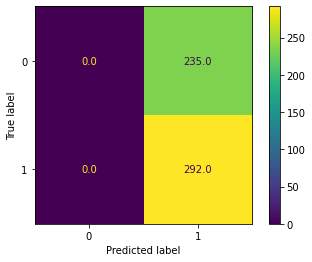

In [64]:
plot_confusion_matrix(linearModel, X_test, Y_test, values_format = '.1f')

In [65]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       235
           1       0.55      1.00      0.71       292

    accuracy                           0.55       527
   macro avg       0.28      0.50      0.36       527
weighted avg       0.31      0.55      0.40       527



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
importancia = linearModel.coef_[0]
importancia

array([-0.0499036 , -0.67883236,  0.73682772, -0.14533265])

In [67]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns, "Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by="Importancia", ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,positive,0.736828
1,negative,-0.049904
2,compound,-0.145333
3,neutral,-0.678832


Implementación con K-Fold Crossvalidation

In [68]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

# Se vuelve a definir el modelo
linearModel = LogisticRegression()

In [69]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(linearModel, param_grid, cv=particiones)

# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, 

In [70]:
mejor_modelo.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}

In [71]:
modelo_lineal_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = modelo_lineal_final.predict(X_train)
y_pred_test = modelo_lineal_final.predict(X_test)
modelo_lineal_final =modelo_lineal_final.fit(X_train,Y_train)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))
print('Recall sobre entrenamiento: %.2f' % recall_score(Y_train, y_pred_train))
print('Recall sobre test: %.2f' % recall_score(Y_test, y_pred_test))
print('Precision sobre entrenamiento: %.2f' % precision_score(Y_train, y_pred_train))
print('Precision sobre test: %.2f' % precision_score(Y_test, y_pred_test))
print('f1 sobre entrenamiento: %.2f' % f1_score(Y_train, y_pred_train))
print('f1 sobre test: %.2f' % f1_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.44
Exactitud sobre test: 0.45
Recall sobre entrenamiento: 0.00
Recall sobre test: 0.00
Precision sobre entrenamiento: 0.00
Precision sobre test: 0.00
f1 sobre entrenamiento: 0.00
f1 sobre test: 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62       235
           1       0.00      0.00      0.00       292

    accuracy                           0.45       527
   macro avg       0.22      0.50      0.31       527
weighted avg       0.20      0.45      0.28       527



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


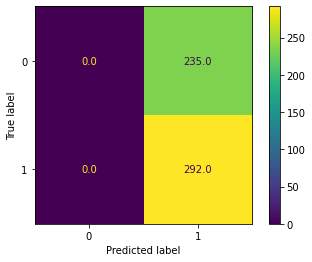

In [73]:
plot_confusion_matrix(modelo_lineal_final, X_test, Y_test, values_format = '.1f')  

In [74]:
# Guarda los resultados del modelo de la regresión logística 
comparision_table["LogisticRegresion"] = []
comparision_table["LogisticRegresion"].append(accuracy_score(Y_test, y_pred_test))
comparision_table["LogisticRegresion"].append(recall_score(Y_test, y_pred_test))
comparision_table["LogisticRegresion"].append(precision_score(Y_test, y_pred_test))
comparision_table["LogisticRegresion"].append(f1_score(Y_test, y_pred_test))




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Árbol de desición**

In [75]:
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [76]:
# Entrenar el modelo de arbol de decisión con los datos de entrenamiento
arbol = arbol.fit(X_train,Y_train)

In [77]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [78]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[109, 126],
       [129, 163]])

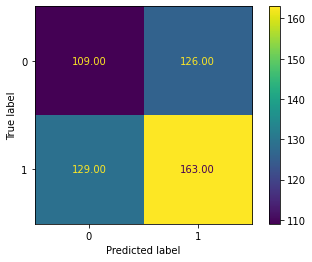

In [79]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test, values_format = '.2f')  
plt.show()  

In [80]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.52
Recall: 0.5582191780821918
Precisión: 0.5640138408304498
Puntuación F1: 0.5611015490533563


In [81]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.46      0.46       235
           1       0.56      0.56      0.56       292

    accuracy                           0.52       527
   macro avg       0.51      0.51      0.51       527
weighted avg       0.52      0.52      0.52       527



In [82]:
importancia= arbol.feature_importances_
importancia

array([0.20148533, 0.2445862 , 0.25318618, 0.30074229])

In [83]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,compound,0.300742
1,positive,0.253186
2,neutral,0.244586
3,negative,0.201485


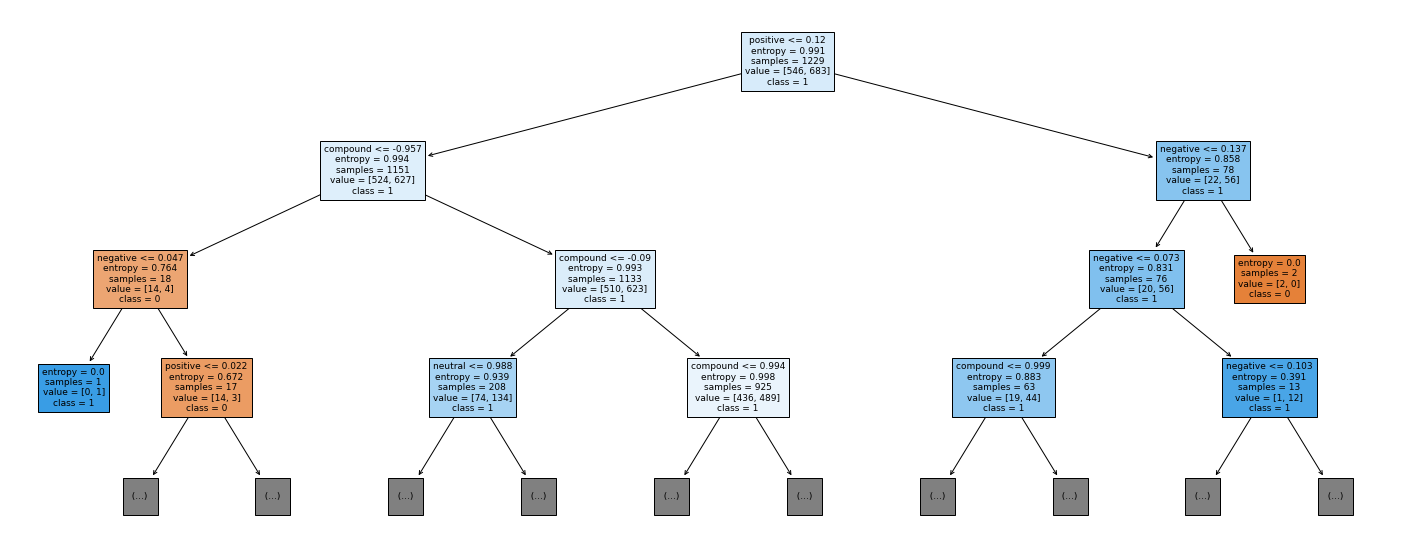

In [84]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

Implementación con K-fold Crossvalidation

In [85]:

# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [86]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20,50,100],'min_samples_split':[2, 3, 4, 5,10,20,50,100]}

In [87]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [88]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
        

In [89]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50}

In [90]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
arbol_final =arbol_final.fit(X_train,Y_train)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))
print('Recall sobre entrenamiento: %.2f' % recall_score(Y_train, y_pred_train))
print('Recall sobre test: %.2f' % recall_score(Y_test, y_pred_test))
print('Precision sobre entrenamiento: %.2f' % precision_score(Y_train, y_pred_train))
print('Precision sobre test: %.2f' % precision_score(Y_test, y_pred_test))
print('f1 sobre entrenamiento: %.2f' % f1_score(Y_train, y_pred_train))
print('f1 sobre test: %.2f' % f1_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.63
Exactitud sobre test: 0.54
Recall sobre entrenamiento: 0.86
Recall sobre test: 0.77
Precision sobre entrenamiento: 0.62
Precision sobre test: 0.56
f1 sobre entrenamiento: 0.72
f1 sobre test: 0.65


In [91]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.48      0.26      0.33       235
           1       0.56      0.77      0.65       292

    accuracy                           0.54       527
   macro avg       0.52      0.51      0.49       527
weighted avg       0.52      0.54      0.51       527



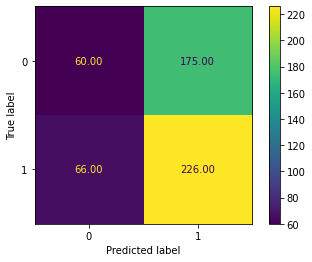

In [92]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol_final, X_test, Y_test, values_format = '.2f')  
plt.show()  

In [93]:
importancia= arbol_final.feature_importances_
importancia

array([0.28613745, 0.20182022, 0.23368434, 0.27835799])

In [94]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,negative,0.286137
1,compound,0.278358
2,positive,0.233684
3,neutral,0.201820


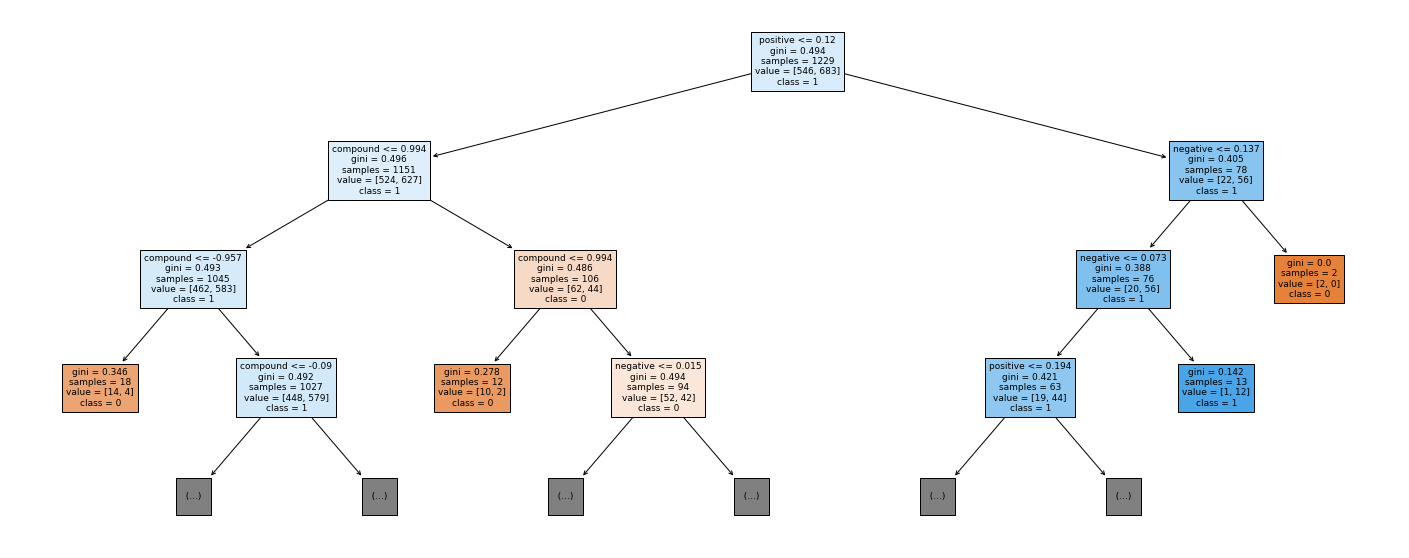

In [95]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol_final, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

In [96]:
# Guarda los resultados del modelo de la regresión logística 
comparision_table["DecisionTree"] = []
comparision_table["DecisionTree"].append(accuracy_score(Y_test, y_pred_test))
comparision_table["DecisionTree"].append(recall_score(Y_test, y_pred_test))
comparision_table["DecisionTree"].append(precision_score(Y_test, y_pred_test))
comparision_table["DecisionTree"].append(f1_score(Y_test, y_pred_test))


## KNN

In [97]:
neigh = KNeighborsClassifier(n_neighbors=4) #
neigh = neigh.fit(X_train, Y_train) #Encaja el clasificador de los K vecinos mas cercanos

In [98]:
#Prediccion 
y_pred = neigh.predict(X_test)

In [99]:
#Matriz confusion
confusion_matrix(Y_test, y_pred)

array([[144,  91],
       [182, 110]])

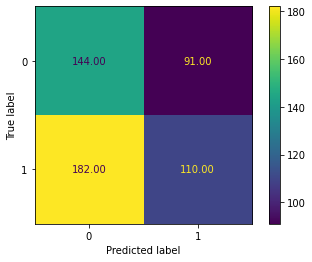

In [100]:
#Matriz confusion
plot_confusion_matrix(neigh, X_test, Y_test, values_format = '.2f')  

In [101]:
#Reporte Clasificacion
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.61      0.51       235
           1       0.55      0.38      0.45       292

    accuracy                           0.48       527
   macro avg       0.49      0.49      0.48       527
weighted avg       0.50      0.48      0.48       527



In [102]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.48
Recall: 0.3767123287671233
Precisión: 0.5472636815920398
Puntuación F1: 0.4462474645030426


Cross Validation

In [103]:
# Parametros a modificar: 
#Numero de vecinos: de 0 a 11
n_neighbors = list(range(1,50))
n_odd_neighbors = list(filter(lambda x: (x % 2 != 0), n_neighbors))

#Funcioon de distancia: Manhatan o Euclidena
p=[1,2] 

In [104]:
#Diccionario de hiperparametros
hiperparametros = dict(n_neighbors=n_neighbors,p=p)
hiperparametros

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 'p': [1, 2]}

In [105]:
#KNN modificado
knn_hiper = KNeighborsClassifier()

In [106]:
#Grid
knn_grid = GridSearchCV(knn_hiper, hiperparametros, cv=10)

In [107]:
knn_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [108]:
#Valor de los hiperparametros con los mejores resultados
print('Best p:', knn_grid.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn_grid.best_estimator_.get_params()['n_neighbors'])

Best p: 2
Best n_neighbors: 29


In [109]:
knn_grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 29,
 'p': 2,
 'weights': 'uniform'}

In [110]:
# Mejor modelo.
mejor_neigh = knn_grid.best_estimator_

In [111]:
#Probar el modelo con los datos de prueba
y_pred_test = mejor_neigh.predict(X_test)

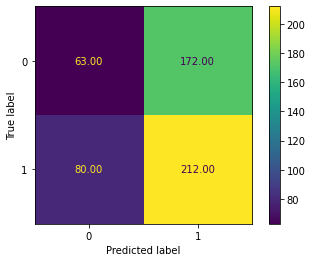

In [112]:
plot_confusion_matrix(mejor_neigh, X_test, Y_test, values_format = '.2f')  
plt.show()

In [113]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred_test))
print("Recall: {}".format(recall_score(Y_test,y_pred_test)))
print("Precisión: {}".format(precision_score(Y_test,y_pred_test)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred_test)))

Exactitud: 0.52
Recall: 0.726027397260274
Precisión: 0.5520833333333334
Puntuación F1: 0.6272189349112427


In [114]:
# Guarda los resultados del modelo de la regresión logística 
comparision_table["KNN"] = []
comparision_table["KNN"].append(accuracy_score(Y_test, y_pred_test))
comparision_table["KNN"].append(recall_score(Y_test, y_pred_test))
comparision_table["KNN"].append(precision_score(Y_test, y_pred_test))
comparision_table["KNN"].append(f1_score(Y_test, y_pred_test))

## Comparación de modelos

In [115]:
scores_table = pd.DataFrame(comparision_table, index =['Accuracy', 'Recall', 'Precision Score', 'F1'])  
scores_table.round(2)


,LogisticRegresion,DecisionTree,KNN
Accuracy,0.45,0.54,0.52
Recall,0.00,0.77,0.73
Precision Score,0.00,0.56,0.55
F1,0.00,0.65,0.63
